In [31]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('datatran.csv',sep=';',encoding='utf-8', low_memory=False, index_col = 0)

In [21]:
df['risco'] = df.d_classificacaoacidente.apply(lambda x: 1 if x in ['Com Vítimas Feridas', 'Com Vítimas Fatais'] else 0)

In [19]:
y = df['risco']

In [20]:
X_cols = ['d_br', 'd_km', 'd_fasedia', 'd_diasemana', 'd_condicaometereologica']
X = df[X_cols]

In [22]:
filtro = X.d_br.value_counts()>99
BR = filtro[filtro]
X = X[X.d_br.isin(BR.index)]

In [23]:
X['br']=X.d_br.astype(int)
X['br']=X.d_br.astype(str)

In [24]:
cols = ['d_br', 'd_km', 'd_fasedia', 'd_diasemana', 'd_condicaometereologica']
X_pronto = pd.get_dummies(X[cols])

In [25]:
y = y[X_pronto.index]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pronto, y, random_state=42, test_size=0.30)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr = LogisticRegression()

In [63]:
lr.fit(X_train, y_train)

C:\Users\Micro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_preds = lr.predict(X_test)

In [67]:
from sklearn.metrics import roc_auc_score

In [68]:
y_preds=lr.predict_proba(X_test)

In [69]:
y_preds=y_preds[:, 1]

In [70]:
roc_lr = roc_auc_score(y_test.values, y_preds)
print(roc_lr)

0.5522569562348056


In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
y_preds = lr.predict(X_test)

In [73]:
cm_lr = confusion_matrix(y_test.values, y_preds)

Text(33.0, 0.5, 'Ocorrido')

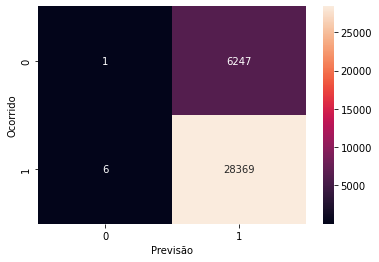

In [84]:
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.xlabel('Previsão')
plt.ylabel('Ocorrido')

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier()

In [86]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
y_preds=knn.predict_proba(X_test)
y_preds=y_preds[:, 1]
roc_knn = roc_auc_score(y_test.values, y_preds)
print(roc_knn)

0.5201999413380564


In [88]:
y_preds=knn.predict(X_test)
cm_knn = confusion_matrix(y_test.values, y_preds)

Text(33.0, 0.5, 'Ocorrido')

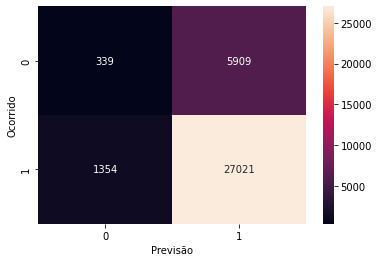

In [90]:
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.xlabel('Previsão')
plt.ylabel('Ocorrido')

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dtc = DecisionTreeClassifier()

In [93]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
y_preds=dtc.predict_proba(X_test)
y_preds=y_preds[:, 1]
roc_dtc = roc_auc_score(y_test.values, y_preds)
print(roc_dtc)

0.5108601899744482


In [95]:
y_preds=dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test.values, y_preds)

Text(33.0, 0.5, 'Ocorrido')

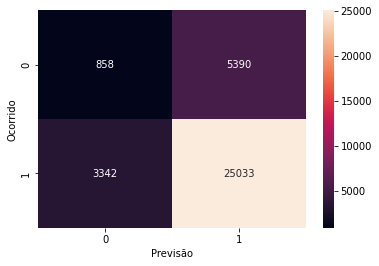

In [96]:
sns.heatmap(cm_dtc, annot=True, fmt='d')
plt.xlabel('Previsão')
plt.ylabel('Ocorrido')

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
gb = GradientBoostingClassifier()

In [99]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [100]:
y_preds=gb.predict_proba(X_test)
y_preds=y_preds[:, 1]
roc_gb = roc_auc_score(y_test.values, y_preds)
print(roc_gb)

0.5577306909136034


In [101]:
y_preds=gb.predict(X_test)
cm_gb = confusion_matrix(y_test.values, y_preds)

Text(33.0, 0.5, 'Ocorrido')

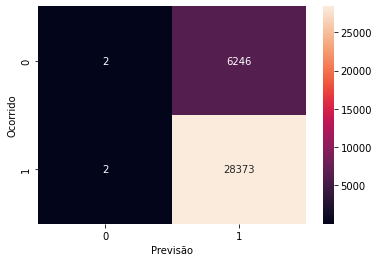

In [ ]:
sns.heatmap(cm_gb, annot=True, fmt='d')
plt.xlabel('Previsão')
plt.ylabel('Ocorrido')

In [134]:
print(roc_lr, roc_knn, roc_dtc, roc_gb, roc_rf)

0.5522569562348056 0.5201999413380564 0.5108601899744482 0.5577306909136034 0.5250403413673873


In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf = RandomForestClassifier()

In [126]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
y_preds=rf.predict_proba(X_test)

In [128]:
y_preds=y_preds[:, 1]

In [129]:
roc_rf = roc_auc_score(y_test.values, y_preds)
print(roc_rf)

0.5250403413673873


In [130]:
y_preds=rf.predict(X_test)

Text(33.0, 0.5, 'Ocorrido')

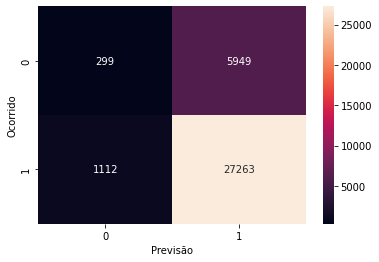

In [131]:
cm_rf = confusion_matrix(y_test.values, y_preds)
sns.heatmap(cm_rf, annot=True, fmt='g')
plt.xlabel('Previsão')
plt.ylabel('Ocorrido')

In [133]:
result = {
    "Regressão Logistica": (roc_lr *100),
    "KNN": (roc_knn *100),
    "Decision Tree": (roc_dtc *100),
    "Gradient Boosting": (roc_gb *100),
    "Random Forest": (roc_rf *100)
}

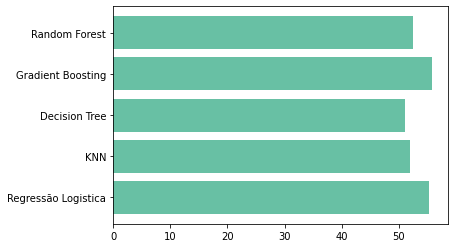

In [135]:
import matplotlib.pyplot as plt
sns.set_palette("Set2",5, .95)

plt.barh(*zip(*result.items()))
plt.show()